# 1. Import the required packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, make_scorer, roc_auc_score
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.inspection import permutation_importance
from scipy.stats import ttest_ind

# 2. Get the data from .csv file (processing via R)

Data Source: https://archive.ics.uci.edu/dataset/573/south+german+credit+update

In [2]:
df = pd.read_csv('credit.csv', index_col=0)

In [3]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
997,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
998,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


# 3. Data Checking

In [4]:
df.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [5]:
df.status.unique()

array(['no checking account', '... < 0 DM',
       '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
      dtype=object)

In [6]:
df.credit_history.unique()

array(['all credits at this bank paid back duly',
       'no credits taken/all credits paid back duly',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'critical account/other credits elsewhere'], dtype=object)

In [7]:
df.purpose.unique()

array(['car (used)', 'others', 'retraining', 'furniture/equipment',
       'car (new)', 'business', 'domestic appliances', 'radio/television',
       'repairs', 'vacation'], dtype=object)

In [8]:
df.savings.unique()

array(['unknown/no savings account', '... <  100 DM',
       '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'],
      dtype=object)

In [9]:
df.employment_duration.unique()

array(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed',
       '>= 7 yrs'], dtype=object)

In [10]:
df.installment_rate.unique()

array(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], dtype=object)

In [11]:
df.personal_status_sex.unique()

array(['female : non-single or male : single', 'male : married/widowed',
       'female : single', 'male : divorced/separated'], dtype=object)

In [12]:
df.other_debtors.unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [13]:
df.present_residence.unique()

array(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'],
      dtype=object)

In [14]:
df.property.unique()

array(['car or other', 'unknown / no property',
       'building soc. savings agr./life insurance', 'real estate'],
      dtype=object)

In [15]:
df.other_installment_plans.unique()

array(['none', 'bank', 'stores'], dtype=object)

In [16]:
df.housing.unique()

array(['for free', 'rent', 'own'], dtype=object)

In [17]:
df.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [18]:
df.job.unique()

array(['skilled employee/official', 'unskilled - resident',
       'unemployed/unskilled - non-resident',
       'manager/self-empl./highly qualif. employee'], dtype=object)

In [19]:
df.people_liable.unique()

array(['0 to 2', '3 or more'], dtype=object)

In [20]:
df.telephone.unique()

array(['no', 'yes (under customer name)'], dtype=object)

In [21]:
df.foreign_worker.unique()

array(['no', 'yes'], dtype=object)

In [22]:
df.credit_risk.unique()

array(['good', 'bad'], dtype=object)

For all categorical variables, the levels are regular.

In [23]:
df.credit_risk.value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

Check on the target variable (`credit_risk`), the data is slightly imbalanced. Transform `credit_risk` by one-hot encoding.

In [24]:
df.credit_risk = df.credit_risk.apply(lambda x: 1 if x == 'bad' else 0)

In [25]:
df.describe()

,duration,amount,age,credit_risk
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,20.903000,3271.24800,35.54200,0.300000
std,12.058814,2822.75176,11.35267,0.458487
min,4.000000,250.00000,19.00000,0.000000
25%,12.000000,1365.50000,27.00000,0.000000
50%,18.000000,2319.50000,33.00000,0.000000
75%,24.000000,3972.25000,42.00000,1.000000
max,72.000000,18424.00000,75.00000,1.000000


For numerical variables, there is no salient outliers.

# 4. Data Visualisation

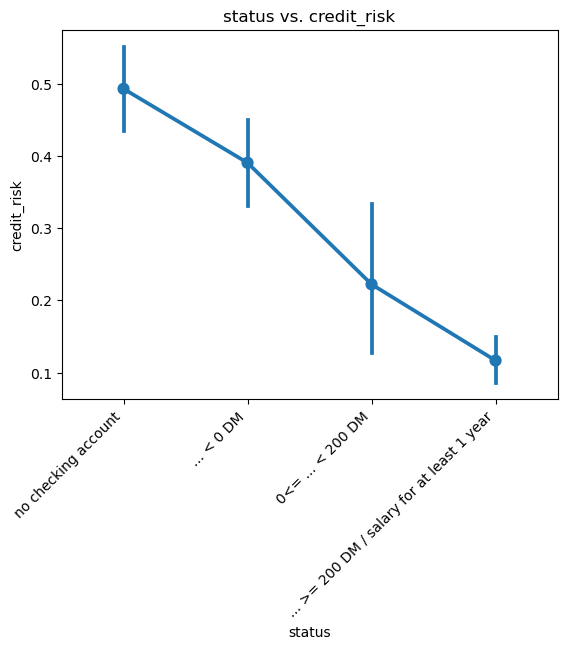

In [26]:
sns.pointplot(x='status', y='credit_risk', data=df, order=['no checking account', 
                                                           '... < 0 DM', '0<= ... < 200 DM', 
                                                           '... >= 200 DM / salary for at least 1 year'])
plt.xticks(rotation=45, ha='right')
plt.title('status vs. credit_risk')
plt.show()

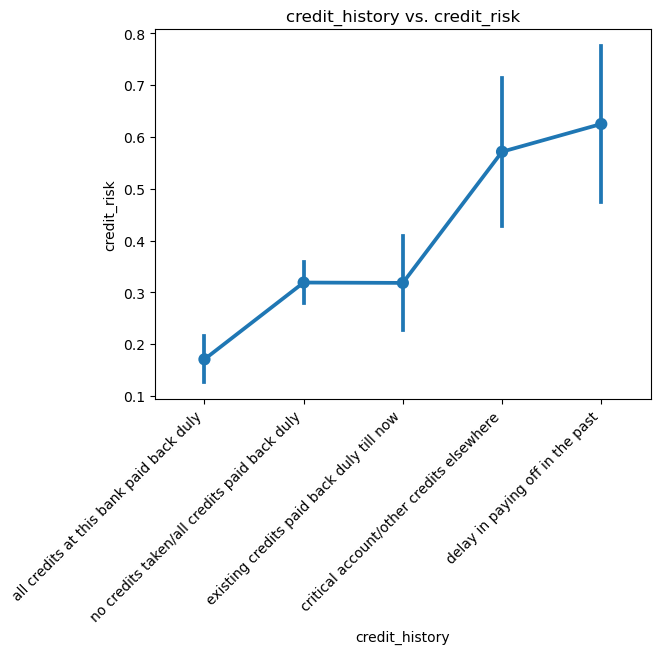

In [27]:
sns.pointplot(x='credit_history', y='credit_risk', data=df, 
              order=['all credits at this bank paid back duly',
                     'no credits taken/all credits paid back duly',
                     'existing credits paid back duly till now','critical account/other credits elsewhere',
                    'delay in paying off in the past'])
plt.xticks(rotation=45, ha='right')
plt.title('credit_history vs. credit_risk')
plt.show()

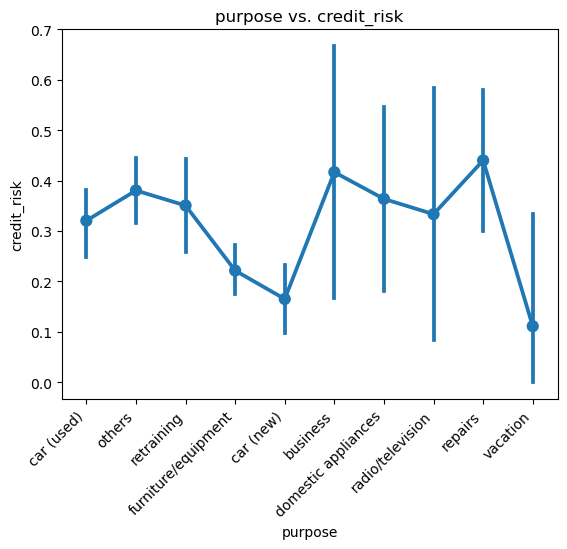

In [28]:
sns.pointplot(x='purpose', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('purpose vs. credit_risk')
plt.show()

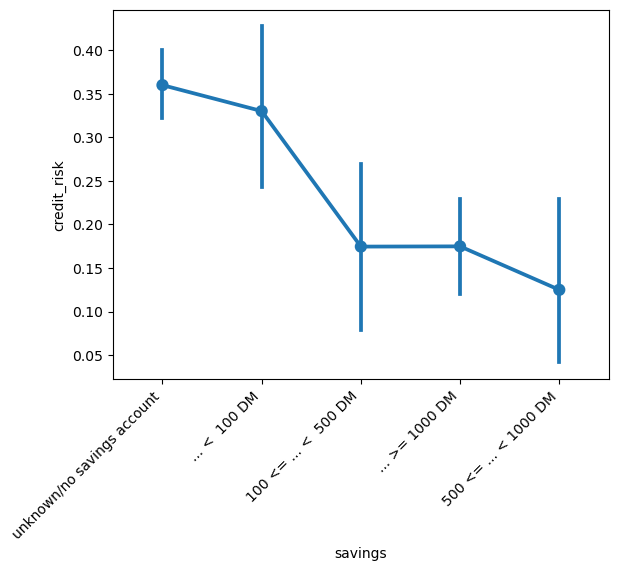

In [29]:
sns.pointplot(x='savings', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

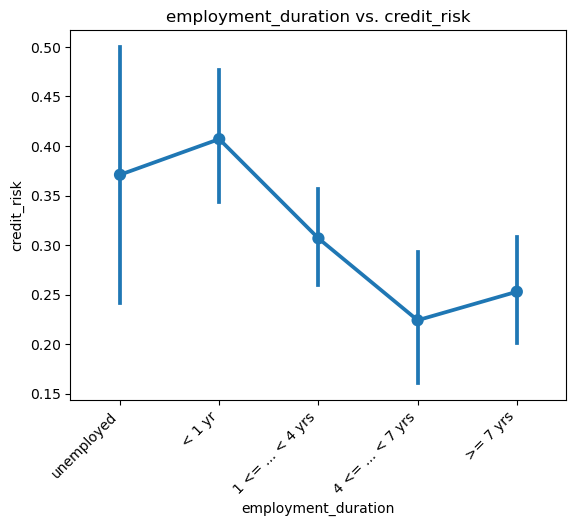

In [30]:
sns.pointplot(x='employment_duration', y='credit_risk', data=df,
             order=['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'])
plt.xticks(rotation=45, ha='right')
plt.title('employment_duration vs. credit_risk')
plt.show()

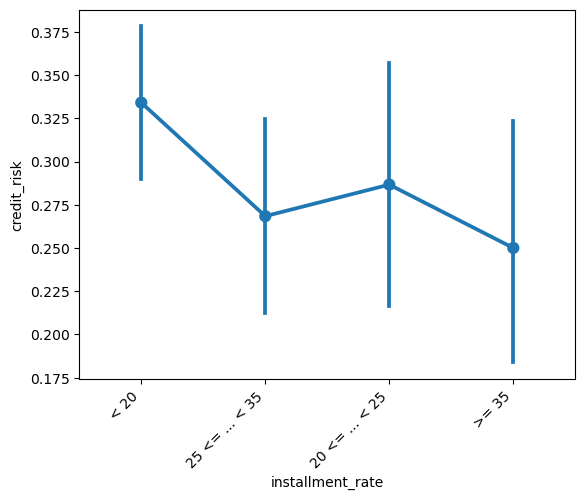

In [31]:
sns.pointplot(x='installment_rate', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

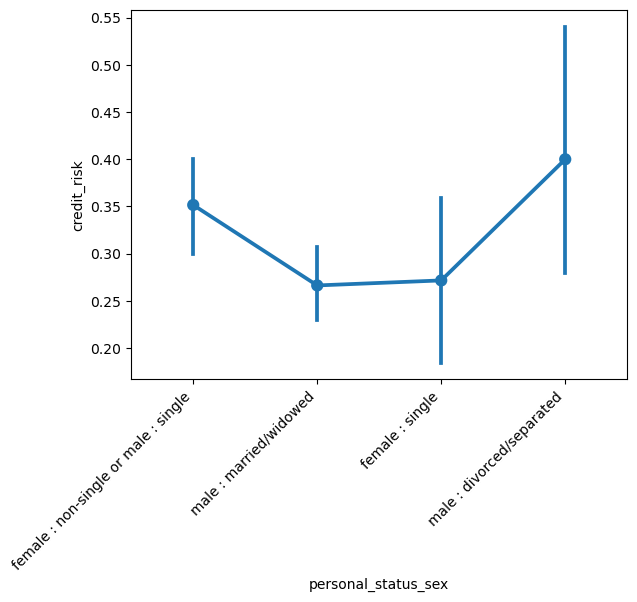

In [32]:
sns.pointplot(x='personal_status_sex', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

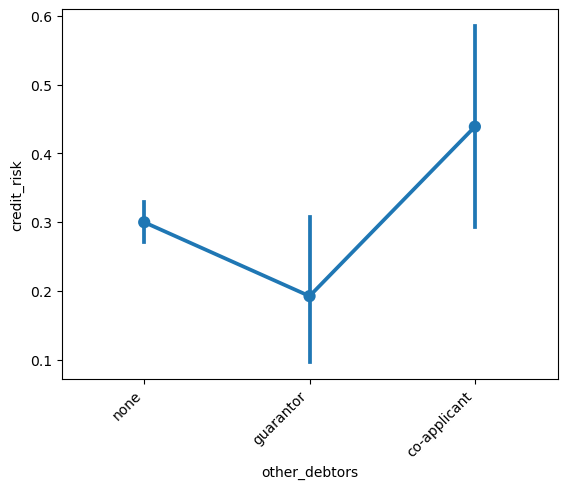

In [33]:
sns.pointplot(x='other_debtors', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

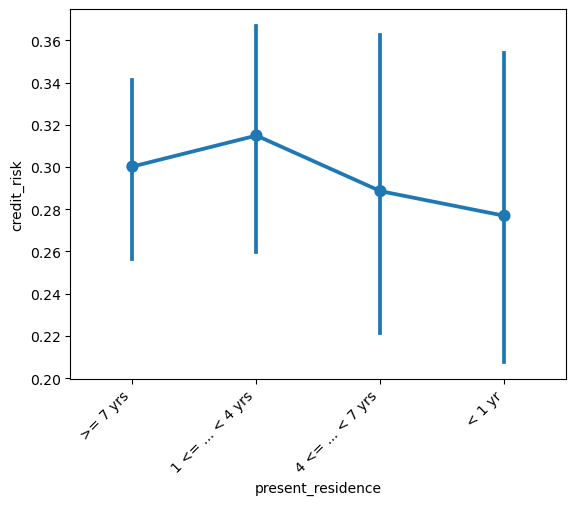

In [34]:
sns.pointplot(x='present_residence', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

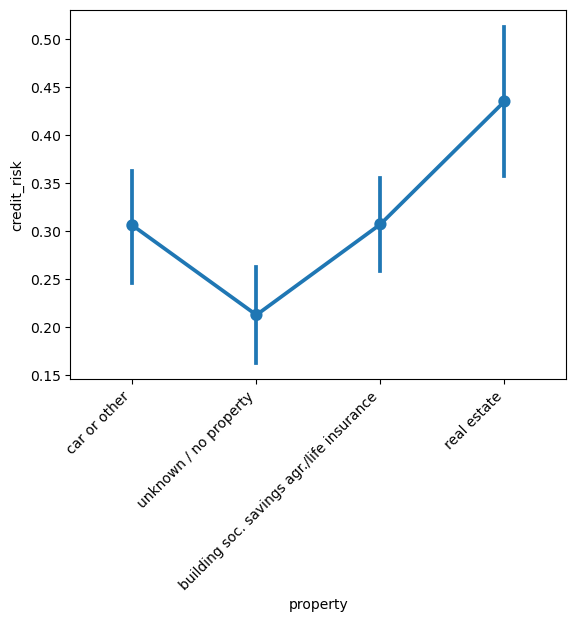

In [35]:
sns.pointplot(x='property', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

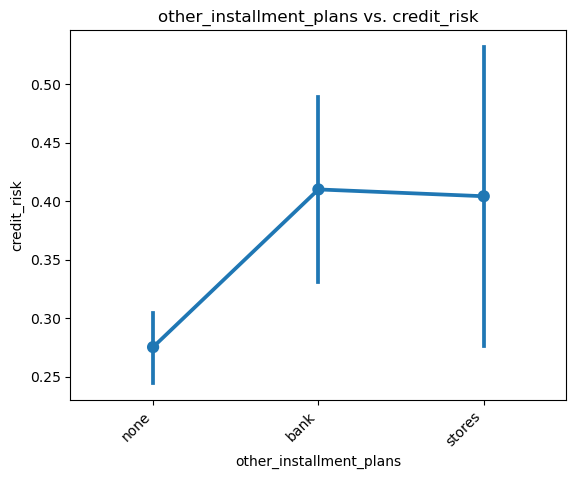

In [36]:
sns.pointplot(x='other_installment_plans', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('other_installment_plans vs. credit_risk')
plt.show()

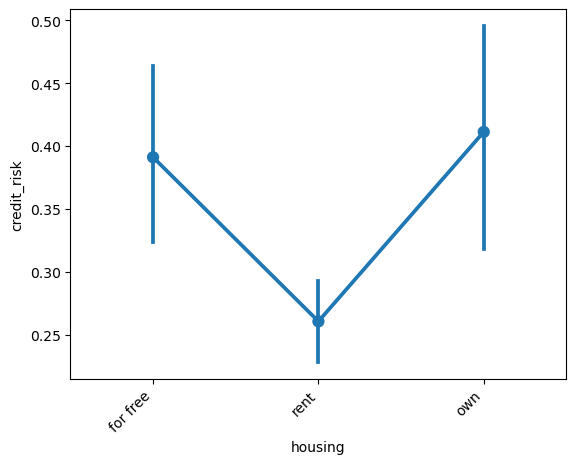

In [37]:
sns.pointplot(x='housing', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

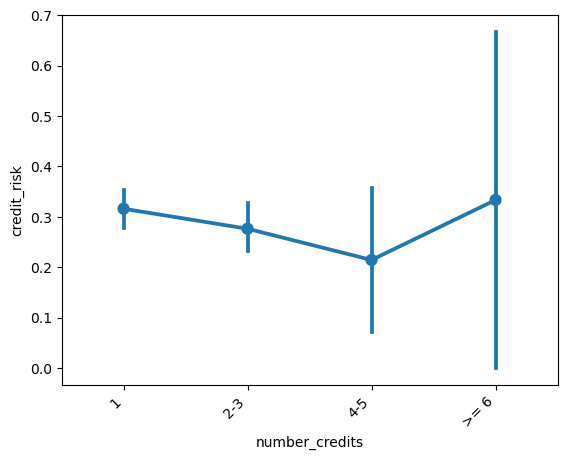

In [38]:
sns.pointplot(x='number_credits', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

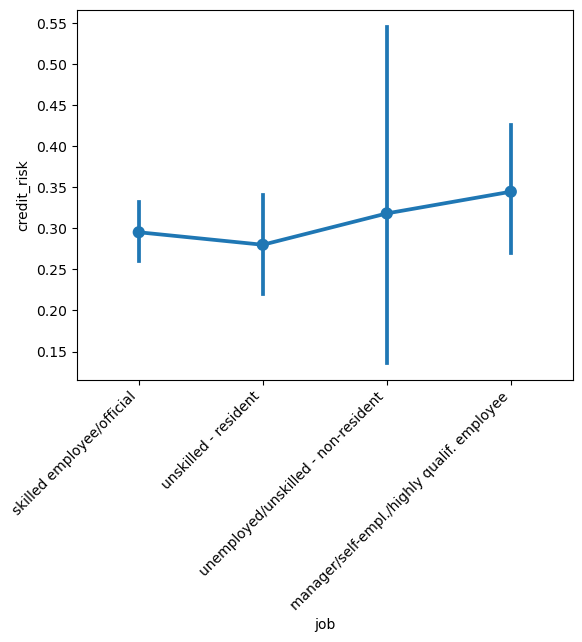

In [39]:
sns.pointplot(x='job', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

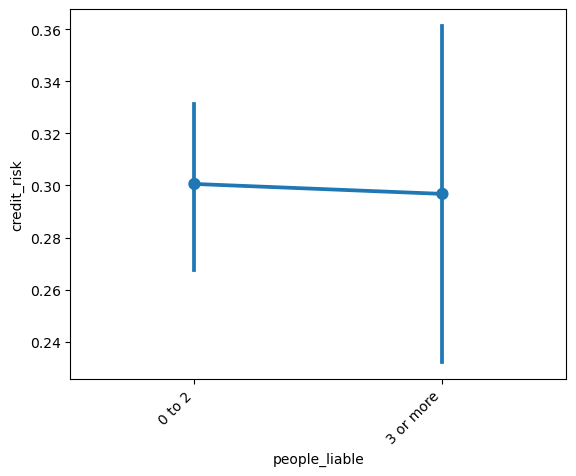

In [40]:
sns.pointplot(x='people_liable', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

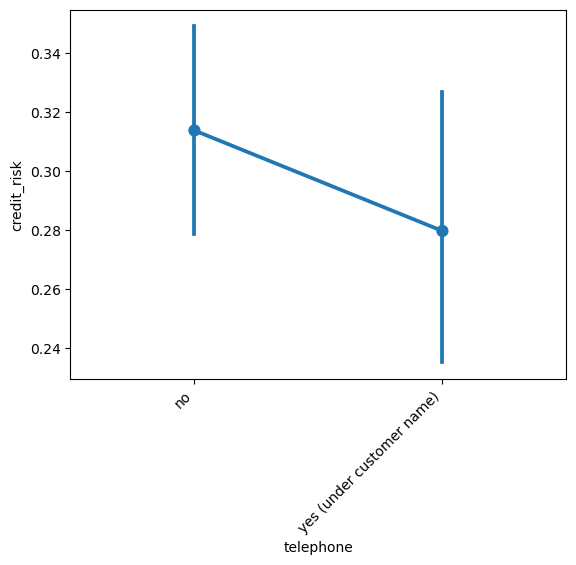

In [41]:
sns.pointplot(x='telephone', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

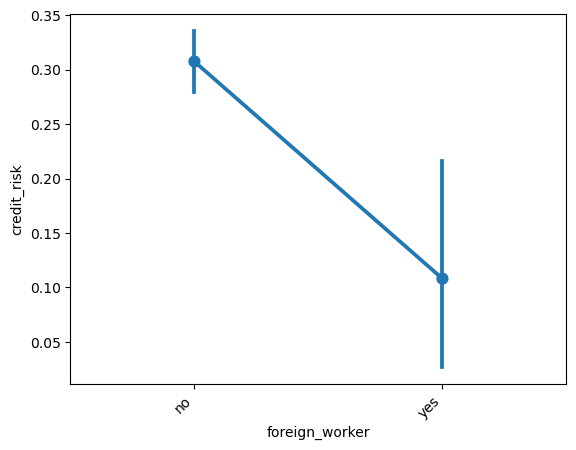

In [42]:
sns.pointplot(x='foreign_worker', y='credit_risk', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

From the plots (categorical variable vs. `credit_risk`) above, we can infer that for the variables `status`, `credit_history`, `purpose`, `savings`, `employment_duration`, `property`, `other_installment_plans`, `housing`, and `foreign_worker`, there is significant difference between two of the levels, which may indicate that these variables are more important than the others.

# 5. Data Engineering

Create dummy variables.

In [43]:
df1 = pd.get_dummies(df, drop_first=True)

In [44]:
df1

,duration,amount,age,credit_risk,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,...,housing_rent,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_3 or more,telephone_yes (under customer name),foreign_worker_yes
1,18,1049,21,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,2799,36,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,12,841,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12,2122,39,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,1
5,12,2171,38,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,24,1987,21,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
997,24,2303,45,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
998,21,12680,30,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999,12,6468,52,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Create training and testing datasets.

In [45]:
X = df1.drop(['credit_risk'], axis=1).values
y = df1.credit_risk.values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=106, stratify=y)

# 6-1. Modelling

From the description (https://www.openml.org/search?type=data&sort=runs&status=active&format=ARFF&id=31), the cost matrix is below,

|             | Predicted Good | Predicted Bad | 
|-------------|----------------|---------------|
| Actual Good | 0              | 1             |
| Actual Bad  | 5              | 0             |

In the project, I use this matrix to calculate the average cost of the prediction and set the training goal as to minimise the cost.

In [47]:
def cost_func(y_true, y_pred):
    weights = np.copy(y_true)
    weights[weights == 1] = 5
    weights[weights == 0] = 1
    cost = np.abs(y_true - y_pred) * weights
    return cost.mean()

In [48]:
cost_scorer = make_scorer(cost_func, greater_is_better=False)

Create training and validation datasets for modelling.

In [49]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.1, random_state=106, stratify=y_train)

In the project, I implement four base models, Logistic Regression, SVM, Random Forest, and XGBoost. Besides, I use other techniques such as PCA and Bagging in an attempt to enhance the performance. Below are the models I've tried.

* Logistic Regression
* SVM
* Random Forest
* XGBClassifier
* Voting Classifier (The combination of the above four)
* PCA + Logistic Regression
* PCA + SVM
* Voting Classifier (The combination of the above two (PCA version))

## Model 01. Logistic Regression

In [50]:
lr = Pipeline([('scale', StandardScaler()),
              ('lr', LogisticRegression(class_weight='balanced', penalty='elasticnet', solver='saga', 
                        random_state=106, max_iter=10000))])

lrp={'lr__C': [1e-4, 1e-3, 1e-2, .1, .5, 1, 5, 10, 20, 100], 'lr__l1_ratio': [0, 0.3, 0.5, 0.8, 1]}

In [51]:
lrg = GridSearchCV(lr, lrp, cv=3, scoring={'f1': 'f1', 'acc': 'accuracy', 
                                                              'precision': 'precision',
                                                              'recall': 'recall', 'cost': cost_scorer},
                   refit='cost')
lrg.fit(X_t, y_t)

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           penalty='elasticnet',
                                                           random_state=106,
                                                           solver='saga'))]),
             param_grid={'lr__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   100],
                         'lr__l1_ratio': [0, 0.3, 0.5, 0.8, 1]},
             refit='cost',
             scoring={'acc': 'accuracy',
                      'cost': make_scorer(cost_func, greater_is_better=False),
                      'f1': 'f1', 'precision': 'precision',
                      'recall': 'recall'})

In [52]:
lrg.best_params_

{'lr__C': 0.01, 'lr__l1_ratio': 0.8}

In [53]:
y_v_lr = lrg.predict(X_v)

In [54]:
print(classification_report(y_v, y_v_lr))

              precision    recall  f1-score   support

           0       0.86      0.48      0.61        63
           1       0.40      0.81      0.54        27

    accuracy                           0.58        90
   macro avg       0.63      0.65      0.57        90
weighted avg       0.72      0.58      0.59        90



In [55]:
cost_func(y_v, y_v_lr)

0.6444444444444445

## Model 02. SVM

In [56]:
sv = Pipeline([('scale', StandardScaler()),
              ('sv', SVC(class_weight='balanced', random_state=106))])

svp={'sv__C': [1e-4, 1e-3, 1e-2, .1, .5, 1, 5, 10, 20, 100]}

In [57]:
svg = GridSearchCV(sv, svp, cv=3, scoring={'f1': 'f1', 'acc': 'accuracy', 
                                                              'precision': 'precision',
                                                              'recall': 'recall', 'cost': cost_scorer},
                   refit='cost')
svg.fit(X_t, y_t)

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('sv',
                                        SVC(class_weight='balanced',
                                            random_state=106))]),
             param_grid={'sv__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   100]},
             refit='cost',
             scoring={'acc': 'accuracy',
                      'cost': make_scorer(cost_func, greater_is_better=False),
                      'f1': 'f1', 'precision': 'precision',
                      'recall': 'recall'})

In [58]:
svg.best_params_

{'sv__C': 0.1}

In [59]:
y_v_sv = svg.predict(X_v)

In [60]:
print(classification_report(y_v, y_v_sv))

              precision    recall  f1-score   support

           0       0.87      0.62      0.72        63
           1       0.47      0.78      0.58        27

    accuracy                           0.67        90
   macro avg       0.67      0.70      0.65        90
weighted avg       0.75      0.67      0.68        90



In [61]:
cost_func(y_v, y_v_sv)

0.6

## Model 03. Random Forest

In [62]:
rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', 
                                                        random_state=106, n_estimators=1000),
                                 param_grid={'max_depth': [5, 8, 10, 12], 'ccp_alpha': [0, 0.3, 0.5, 0.8, 1.0],
                                             'max_samples': [0.5, 0.8, 1]},
                                 cv=3,
                                 refit='cost',
                                scoring={'f1': 'f1', 'acc': 'accuracy', 'precision': 'precision',
                                      'recall': 'recall', 'cost': cost_scorer})

In [63]:
rf.fit(X_t, y_t)

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/skl

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/skl

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/skl

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/skl

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/skl

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/skl

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=1000,
                                              random_state=106),
             param_grid={'ccp_alpha': [0, 0.3, 0.5, 0.8, 1.0],
                         'max_depth': [5, 8, 10, 12],
                         'max_samples': [0.5, 0.8, 1]},
             refit='cost',
             scoring={'acc': 'accuracy',
                      'cost': make_scorer(cost_func, greater_is_better=False),
                      'f1': 'f1', 'precision': 'precision',
                      'recall': 'recall'})

In [64]:
pd.DataFrame(rf.cv_results_).loc[:,['params', 'mean_test_f1', 'mean_test_acc',
                                     'mean_test_precision', 'mean_test_recall', 'mean_test_cost']]

,params,mean_test_f1,mean_test_acc,mean_test_precision,mean_test_recall,mean_test_cost
0,"{'ccp_alpha': 0, 'max_depth': 5, 'max_samples'...",0.576873,0.735802,0.553610,0.604938,-0.738272
1,"{'ccp_alpha': 0, 'max_depth': 5, 'max_samples'...",0.602794,0.739506,0.554958,0.662551,-0.665432
2,"{'ccp_alpha': 0, 'max_depth': 5, 'max_samples'...",0.000000,0.700000,0.000000,0.000000,-1.500000
3,"{'ccp_alpha': 0, 'max_depth': 8, 'max_samples'...",0.533025,0.753086,0.619720,0.469136,-0.883951
4,"{'ccp_alpha': 0, 'max_depth': 8, 'max_samples'...",0.543232,0.739506,0.573204,0.518519,-0.838272
5,"{'ccp_alpha': 0, 'max_depth': 8, 'max_samples'...",0.000000,0.700000,0.000000,0.000000,-1.500000
6,"{'ccp_alpha': 0, 'max_depth': 10, 'max_samples...",0.458220,0.740741,0.615367,0.366255,-1.019753
7,"{'ccp_alpha': 0, 'max_depth': 10, 'max_samples...",0.514269,0.755556,0.639402,0.432099,-0.925926
8,"{'ccp_alpha': 0, 'max_depth': 10, 'max_samples...",0.000000,0.700000,0.000000,0.000000,-1.500000
9,"{'ccp_alpha': 0, 'max_depth': 12, 'max_samples...",0.400065,0.733333,0.615879,0.296296,-1.111111


In [65]:
rf.best_params_

{'ccp_alpha': 0, 'max_depth': 5, 'max_samples': 0.8}

In [66]:
y_v_rf = rf.predict(X_v)

In [67]:
print(classification_report(y_v, y_v_rf))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        63
           1       0.50      0.67      0.57        27

    accuracy                           0.70        90
   macro avg       0.67      0.69      0.67        90
weighted avg       0.73      0.70      0.71        90



In [68]:
cost_func(y_v, y_v_rf)

0.7

## Model 04. XGBoost

In [69]:
xg = XGBClassifier(n_estimators=1000, random_state=106, scale_pos_weight=1.67, 
                   max_depth=5, colsample_bynode=0.5, gamma=0.5, colsample_bylevel=0.5, learning_rate=0.1,
                  colsample_bytree=0.8, alpha=1)
xg_p = {'lambda': [50, 100, 200]}

In [70]:
gxg = GridSearchCV(xg, xg_p, scoring={'f1': 'f1', 'acc': 'accuracy', 'precision': 'precision',
                                      'recall': 'recall', 'cost': cost_scorer},
                   cv=5, refit='cost')

In [72]:
gxg.fit(X_t, y_t)

GridSearchCV(cv=5,
             estimator=XGBClassifier(alpha=1, base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=0.5,
                                     colsample_bynode=0.5, colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'lambda': [50, 100, 200]}, refit='cost',
             scoring={'acc': 'accuracy',
                      'cost': make_scorer(cost_func, greater_is_better=False),
                      'f1': 'f1', 'precision': 'precision',
                      'recall': 'recall'})

In [73]:
pd.DataFrame(gxg.cv_results_).loc[:,['params', 'mean_test_f1', 'mean_test_acc',
                                     'mean_test_precision', 'mean_test_recall', 'mean_test_cost']]

,params,mean_test_f1,mean_test_acc,mean_test_precision,mean_test_recall,mean_test_cost
0,{'lambda': 50},0.591918,0.741975,0.567715,0.621769,-0.712346
1,{'lambda': 100},0.607577,0.753086,0.582907,0.638180,-0.681481
2,{'lambda': 200},0.597351,0.745679,0.570833,0.629932,-0.698765


In [74]:
gxg.best_params_

{'lambda': 100}

In [76]:
y_v_gxg = gxg.best_estimator_.predict(X_v)

In [77]:
print(classification_report(y_v, y_v_gxg))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        63
           1       0.63      0.63      0.63        27

    accuracy                           0.78        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.78      0.78      0.78        90



In [78]:
cost_func(y_v, y_v_gxg)

0.6666666666666666

## Model 05. Voting Classifier

### Best Estimator

In [79]:
rfe = RandomForestClassifier(class_weight='balanced', random_state=106, n_estimators=1000, 
                            ccp_alpha=0, max_depth=5, max_samples=0.8)

xge = XGBClassifier(n_estimators=1000, random_state=106, scale_pos_weight=1.67, 
                   max_depth=5, colsample_bynode=0.5, gamma=0.5, colsample_bylevel=0.5, learning_rate=0.1,
                  colsample_bytree=0.8, alpha=1, reg_lambda=100)

In [80]:
vc = VotingClassifier([('lrg', lrg.best_estimator_), ('svg', svg.best_estimator_), 
                       ('rfe', rfe), ('xge', xge)], voting='hard',
                     weights=np.array([1, 2, 1, 1]))

In [81]:
vc.fit(X_t, y_t)

VotingClassifier(estimators=[('lrg',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('lr',
                                               LogisticRegression(C=0.01,
                                                                  class_weight='balanced',
                                                                  l1_ratio=0.8,
                                                                  max_iter=10000,
                                                                  penalty='elasticnet',
                                                                  random_state=106,
                                                                  solver='saga'))])),
                             ('svg',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('sv',
                                               SVC(C=0.1,
                                                   class_weight='balanced',
                                                   random_state=106))])),
                             ('rfe',
                              RandomFores...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 weights=array([1, 2, 1, 1]))

In [82]:
y_v_vc = vc.predict(X_v)

In [83]:
print(classification_report(y_v, y_v_vc))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77        63
           1       0.51      0.74      0.61        27

    accuracy                           0.71        90
   macro avg       0.69      0.72      0.69        90
weighted avg       0.76      0.71      0.72        90



In [84]:
cost_func(y_v, y_v_vc)

0.6

From the five models above, the SVM and the Voting Classifier perform best in terms of the cost.

# 6-2. PCA + Others

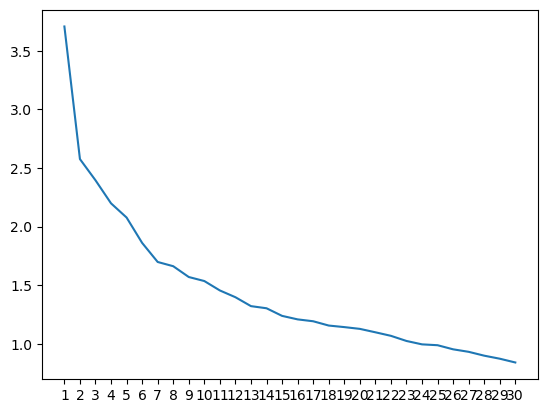

In [158]:
ss_pca = StandardScaler()
pca = PCA(n_components=30)
pca.fit(ss_pca.fit_transform(X_t))

plt.plot(list(range(1,31)), pca.explained_variance_)
plt.xticks(list(range(1,31)))
plt.show()

In [159]:
np.sum(pca.explained_variance_ratio_)

0.804520556834098

The first 30 PCs can explain around 80% variance so I choose 30 as the number of components I use in the model. Here I only implement the Logistic Regression, SVM, and Voting Classifier model with PCA.

## Model 06. Logistic Regression

In [160]:
lrd = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=30)),
              ('lr', LogisticRegression(class_weight='balanced', penalty='elasticnet', solver='saga', 
                        random_state=106, max_iter=10000))])

lrdp={'lr__C': [1e-4, 1e-3, 1e-2, .1, .5, 1, 5, 10, 20, 100], 'lr__l1_ratio': [0, 0.3, 0.5, 0.8, 1]}

In [161]:
lrdg = GridSearchCV(lrd, lrdp, cv=3, scoring={'f1': 'f1', 'acc': 'accuracy', 
                                                              'precision': 'precision',
                                                              'recall': 'recall', 'cost': cost_scorer},
                   refit='cost')
lrdg.fit(X_t, y_t)

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=30)),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           penalty='elasticnet',
                                                           random_state=106,
                                                           solver='saga'))]),
             param_grid={'lr__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   100],
                         'lr__l1_ratio': [0, 0.3, 0.5, 0.8, 1]},
             refit='cost',
             scoring={'acc': 'accuracy',
                      'cost': make_scorer(cost_func, greater_is_better=False),
                      'f1': 'f1', 'precision': 'precision',
                      'recall': 'recall'})

In [162]:
lrdg.best_params_

{'lr__C': 0.001, 'lr__l1_ratio': 0}

In [163]:
y_v_lrp = lrdg.predict(X_v)

In [164]:
print(classification_report(y_v, y_v_lrp))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78        63
           1       0.51      0.70      0.59        27

    accuracy                           0.71        90
   macro avg       0.68      0.71      0.68        90
weighted avg       0.75      0.71      0.72        90



In [165]:
cost_func(y_v, y_v_lrp)

0.6444444444444445

## Model 07. SVM

In [166]:
svd = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=30)),
              ('sv', SVC(class_weight='balanced', random_state=106))])

svdp={'sv__C': [1e-4, 1e-3, 1e-2, .1, .5, 1, 5, 10, 20, 100]}

In [167]:
svdg = GridSearchCV(svd, svdp, cv=3, scoring={'f1': 'f1', 'acc': 'accuracy', 
                                                              'precision': 'precision',
                                                              'recall': 'recall', 'cost': cost_scorer},
                   refit='cost')
svdg.fit(X_t, y_t)

/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex/miniforge3/envs/alex/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=30)),
                                       ('sv',
                                        SVC(class_weight='balanced',
                                            random_state=106))]),
             param_grid={'sv__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   100]},
             refit='cost',
             scoring={'acc': 'accuracy',
                      'cost': make_scorer(cost_func, greater_is_better=False),
                      'f1': 'f1', 'precision': 'precision',
                      'recall': 'recall'})

In [168]:
svdg.best_params_

{'sv__C': 0.1}

In [169]:
y_v_svp = svdg.predict(X_v)

In [170]:
print(classification_report(y_v, y_v_svp))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78        63
           1       0.51      0.70      0.59        27

    accuracy                           0.71        90
   macro avg       0.68      0.71      0.68        90
weighted avg       0.75      0.71      0.72        90



In [171]:
cost_func(y_v, y_v_svp)

0.6444444444444445

## Model 08. Voting Classifier

In [172]:
vcp = VotingClassifier([('lrdg', lrdg.best_estimator_), ('svdg', svdg.best_estimator_)], voting='hard')

In [173]:
vcp.fit(X_t, y_t)

VotingClassifier(estimators=[('lrdg',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('pca', PCA(n_components=30)),
                                              ('lr',
                                               LogisticRegression(C=0.001,
                                                                  class_weight='balanced',
                                                                  l1_ratio=0,
                                                                  max_iter=10000,
                                                                  penalty='elasticnet',
                                                                  random_state=106,
                                                                  solver='saga'))])),
                             ('svdg',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('pca', PCA(n_components=30)),
                                              ('sv',
                                               SVC(C=0.1,
                                                   class_weight='balanced',
                                                   random_state=106))]))])

In [174]:
y_v_vcp = vcp.predict(X_v)

In [175]:
print(classification_report(y_v, y_v_vcp))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        63
           1       0.56      0.70      0.62        27

    accuracy                           0.74        90
   macro avg       0.71      0.73      0.71        90
weighted avg       0.77      0.74      0.75        90



In [176]:
cost_func(y_v, y_v_vcp)

0.6111111111111112

In terms of the cost, the Voting Classifier performs the best but is still slightly worse than the ones without PCA. Now I use cross validation to make sure the observations are reliable.

## Cross Validation

In [177]:
cv01 = cross_validate(lrg.best_estimator_, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv02 = cross_validate(svg.best_estimator_, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv03 = cross_validate(rfe, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv04 = cross_validate(xge, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv05 = cross_validate(vc, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv06 = cross_validate(lrdg.best_estimator_, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv07 = cross_validate(svdg.best_estimator_, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})
cv08 = cross_validate(vcp, X_train, y_train, scoring={'cost': cost_scorer, 'recall': 'recall'})

In [178]:
cv_score_cost = []
cv_score_recall = []

for i in [cv01, cv02, cv03, cv04, cv05, cv06, cv07, cv08]:
    cv_score_cost.append(round(np.mean(i['test_cost']), 2))
    cv_score_recall.append(round(np.mean(i['test_recall']), 2))

In [179]:
cv_score_cost

[-0.58, -0.6, -0.71, -0.77, -0.6, -0.63, -0.64, -0.66]

In [180]:
cv_score_recall

[0.85, 0.79, 0.64, 0.58, 0.76, 0.72, 0.73, 0.69]

Based on the cross validation result, we can observe that Model 08. Voting Classifier doesn't outperform the models without PCA. The top 2 models are Model 01. Logistic Regression, Model 02. SVM.

# 7. Final Model

To construct the final model, I select the best two models, Model 01. Logistic Regression and Model 02. SVM. Here I refit these three models with full training dataset again and check the performance on the testing dataset.

## Model 01. Logistic Regression

In [140]:
lrg.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    l1_ratio=0.8, max_iter=10000,
                                    penalty='elasticnet', random_state=106,
                                    solver='saga'))])

In [141]:
y_predict = lrg.best_estimator_.predict(X_test)

In [142]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.54      0.67        70
           1       0.43      0.80      0.56        30

    accuracy                           0.62       100
   macro avg       0.65      0.67      0.61       100
weighted avg       0.73      0.62      0.63       100



In [143]:
cost_func(y_test, y_predict)

0.62

In [144]:
roc_auc_score(y_test, y_predict)

0.6714285714285715

## Model 02. SVM

In [145]:
svg.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('sv', SVC(C=0.1, class_weight='balanced', random_state=106))])

In [146]:
y_predict1 = svg.best_estimator_.predict(X_test)

In [147]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        70
           1       0.53      0.83      0.65        30

    accuracy                           0.73       100
   macro avg       0.72      0.76      0.71       100
weighted avg       0.79      0.73      0.74       100



In [148]:
cost_func(y_test, y_predict1)

0.47

In [149]:
roc_auc_score(y_test, y_predict1)

0.7595238095238096

From the results above, Model 02. SVM is better than another in most metrics including cost, precision, recall, accuracy, f1-score, and roc-auc score. Hence, I will explain Model 02. SVM. by evaluating permutation importance in respect of the cost.

# 8. Feature Importance

In [150]:
f_imp = permutation_importance(svg.best_estimator_, X_test, y_test, 
                               scoring={'cost': cost_scorer}, 
                               random_state=106)

In [151]:
col_name = df1.drop(['credit_risk'], axis=1).columns

In [152]:
df_imp = pd.DataFrame({'feature': col_name, 'importances_mean': f_imp['cost']['importances_mean'],
             'importances_std': f_imp['cost']['importances_std']})

In [153]:
df_imp.sort_values(['importances_mean'], ascending=False).loc[df_imp.importances_mean >= 0.05,:]

,feature,importances_mean,importances_std
3,status_... >= 200 DM / salary for at least 1 year,0.162,0.017205
0,duration,0.136,0.096042
5,status_no checking account,0.120,0.034059
26,employment_duration_unemployed,0.100,0.025298
42,other_installment_plans_stores,0.054,0.004899
14,purpose_others,0.054,0.008000
23,employment_duration_4 <= ... < 7 yrs,0.054,0.041761
6,credit_history_critical account/other credits ...,0.050,0.006325


Here I select the variables with importance more than 0.05 in the scale of the cost. The variables are align with the observations in the section of 4. Data Visualisation. As for the relationship between `duration` and `credit_risk`, I illustrate it via a t-test.

In [154]:
ttest_ind(df.loc[df.credit_risk == 0, 'duration'], df.loc[df.credit_risk == 1, 'duration'])

Ttest_indResult(statistic=-6.9522507242467215, pvalue=6.488049877184348e-12)

Based on the result above, the p-value is significant at any reasonable confidence levels, so we can conclude that for the population with different credit risk, their credit durations are significantly different. Noted that there is no sufficient evidence for us to say that different credit durations can ***cause*** different risk but the conclusion can shed lights on the relationship between these two variables.

In [155]:
np.mean(df.loc[df.credit_risk == 0, 'duration'])

19.207142857142856

In [156]:
np.mean(df.loc[df.credit_risk == 1, 'duration'])

24.86